Anomaly categories:
['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',

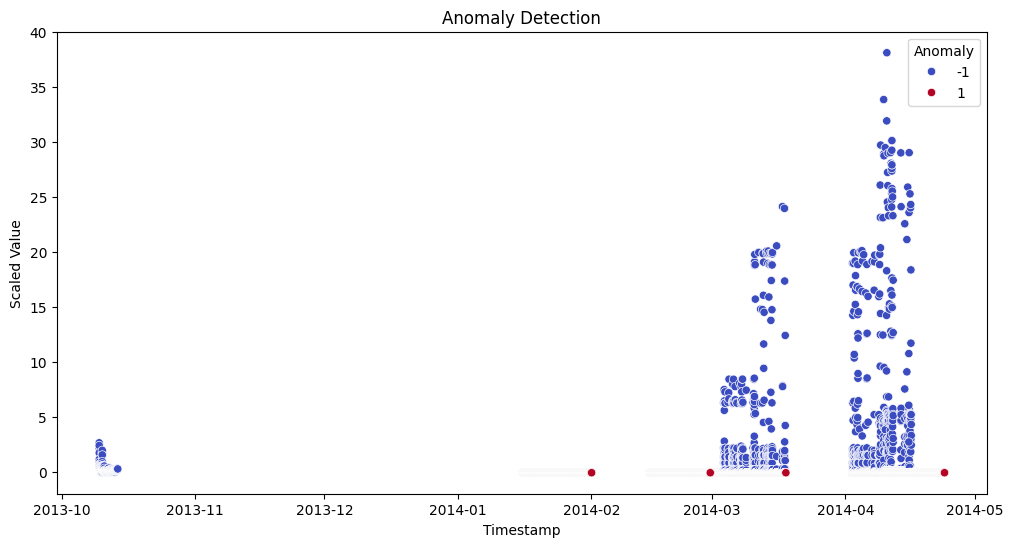

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load data
csv_files = [file for file in os.listdir('computing-usage-dataset') if file.endswith('.csv')]
df = pd.concat([pd.read_csv(os.path.join('computing-usage-dataset', file)) for file in csv_files], ignore_index=True)

# Preprocess the Data
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df['timestamp'] = pd.to_datetime(df['timestamp'])
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Implement anomaly detection
model = IsolationForest(contamination=0.1)
model.fit(df[numeric_columns])
anomaly_scores = model.decision_function(df[numeric_columns])
anomaly_labels = model.predict(df[numeric_columns])

# Categorize anomalies
thresholds = {
    'temporary_spike': 2,
    'gradual_drift': 1.5,
    'sudden_drop': 1
}
anomaly_categories = []
for score in anomaly_scores:
    if score > thresholds['temporary_spike']:
        anomaly_categories.append('temporary_spike')
    elif score > thresholds['gradual_drift']:
        anomaly_categories.append('gradual_drift')
    elif score > thresholds['sudden_drop']:
        anomaly_categories.append('sudden_drop')
    else:
        anomaly_categories.append('normal')

# Implement anomaly scoring (optional)
scoring_system = {
    'temporary_spike': 3,
    'gradual_drift': 2,
    'sudden_drop': 1,
    'normal': 0
}

# Calculate anomaly scores
anomaly_scores = []
for category in anomaly_categories:
    anomaly_scores.append(scoring_system[category])

# Print the results
print("Anomaly categories:")
print(anomaly_categories)
print("\nAnomaly scores:")
print(anomaly_scores)

# Visualize the anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['timestamp'], y=df[numeric_columns[0]], hue=anomaly_labels, palette='coolwarm')
plt.title('Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('Scaled Value')
plt.legend(title='Anomaly')
plt.show()
